## step1. 탐색 : 데이터의 기초 정보 살펴보기

#### ** read_csv() : 데이터를 데이터 프레임 형태로 불러오는 함수
#### ** info() : 데이터에 대한 전반적인 정보 나타냄
#### ** describe() : 수치형 정보의 요약통계량
#### ** head() : 상위 몇개의 데이터를 불러옴

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../Downloads/python-data-analysis-master/data/drinks.csv'
drinks = pd.read_csv(file_path) 
print(drinks.info()) # 피처 종류, 수치형 피처는 무엇인지, 결측값 갯수 등 파악가능 
print('-----------------')
print(drinks.describe())
print('-----------------')
drinks.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
-----------------
       beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


## step2. 인사이트의 발견 : 탐색과 시각화하기

#### ** corr() : 피처간의 상관관계 구하는 함수
#### ** seaborn : 시각화 라이브러리

In [17]:
# beer_servings, wine_servings 의 상관관계, pearson방법이용
corr = drinks[['beer_servings','wine_servings']].corr(method = 'pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [19]:
# 모든 피처간의 상관관계 구하기
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']

corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


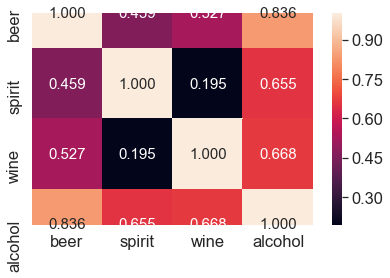

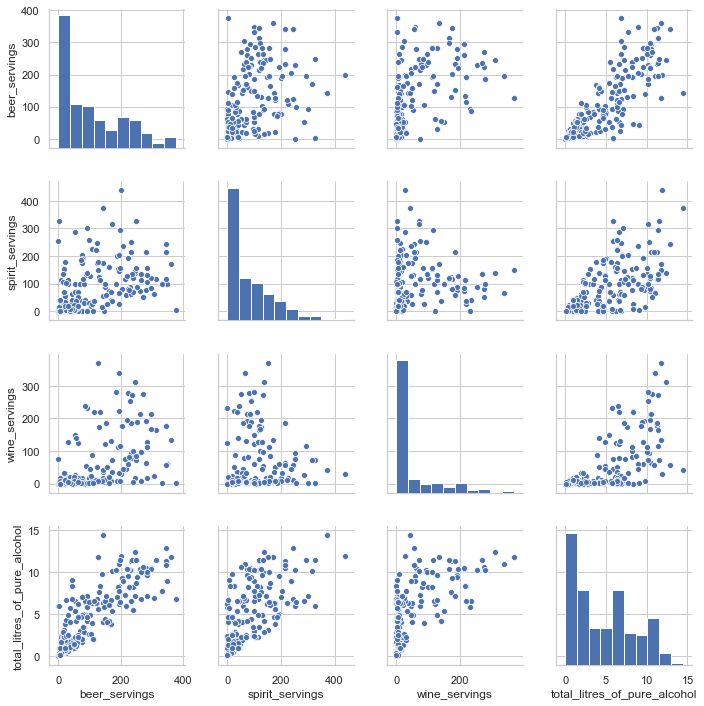

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr행렬 히트맵 시각화
cols = ['beer','spirit','wine','alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,  # colorbar의 유무
                annot = True, # 각 셀에 값 표기 유무
                fmt = '.3f',  # 셀 값의 데이터 형식
                annot_kws = {'size':15}, # 셀 값의 크기
                square = True,
                yticklabels = cols,
                xticklabels = cols)

plt.tight_layout() # 창 크기에 맞게 Axes를 조절
plt.show()


# 피처간의 산점도 그래프 출력
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height = 2.5)

plt.show()


## step3. 탐색적분석 : 스무고개로 개념적 탐색 분석하기

#### ** fillna() : 결측값을 채워줌
#### ** value_counts() : 값의 발생 빈도 계산
#### ** agg() : goupby된 데이터에 대해 여러컬럼, 여러 함수 적용 가능

In [32]:
# 결측 데이터 전처리
drinks['continent'] = drinks['continent'].fillna('Other') # 대륙컬럼의 결측위치에 Other 값을 넣음
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,Other
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


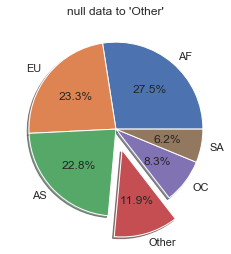

In [43]:
# 파이차트로 시각화 하기

labels = drinks['continent'].value_counts().index.tolist()
valCnt = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

# explode : 부채꼴이 파이차트 중심에서 벗어나는 정도
# autopct : 파이차트 안의 값의 형식
# shadow : 그림자 나타내기
plt.pie(valCnt, explode = explode, labels = labels, autopct = '%.1f%%', shadow=True)
plt.title('null data to \'Other\'')
plt.show()

In [34]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산

result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum']) # 여러함수 적용
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
Other,165.739130,68,438,3812


In [35]:
result = drinks.groupby('continent').agg({'spirit_servings' : 'mean', 'wine_servings' : 'sum'})
result.head()

,spirit_servings,wine_servings
continent,,
AF,16.339623,862
AS,60.840909,399
EU,132.555556,6400
OC,58.437500,570
Other,165.739130,564


In [55]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?

total_mean = drinks['total_litres_of_pure_alcohol'].mean()
print(total_mean)

continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)

continent_over_mean = continent_mean[continent_mean > total_mean]
continent_over_mean

4.717098445595855
continent
AF       3.007547
AS       2.170455
EU       8.617778
OC       3.381250
Other    5.995652
SA       6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


continent
EU       8.617778
Other    5.995652
SA       6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [36]:
# 평균 beer_servings가 가장 높은 대륙은?
beer_continent = drinks.groupby('continent').beer_servings.mean()
print(beer_continent)

answer = beer_continent.idxmax()
print('answer : ' + answer)

continent
AF        61.471698
AS        37.045455
EU       193.777778
OC        89.687500
Other    145.434783
SA       175.083333
Name: beer_servings, dtype: float64
answer : EU


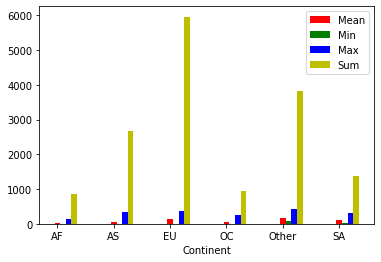

In [37]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화

result_agg = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum']) 
result_agg
n_groups = len(result_agg)
n_groups

means = result_agg['mean'].tolist()
mins = result_agg['min'].tolist()
maxs = result_agg['max'].tolist()
sums = result_agg['sum'].tolist()

index = np.arange(n_groups)
index

bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index + 2*bar_width, maxs, bar_width, color = 'b', label = 'Max')
rects4 = plt.bar(index + 3*bar_width, sums, bar_width, color='y', label = 'Sum')

plt.xticks(index, result.index.tolist())  # xticks() : x축에 표시되는 값
plt.xlabel('Continent')
plt.legend() # 범례표시
plt.show()

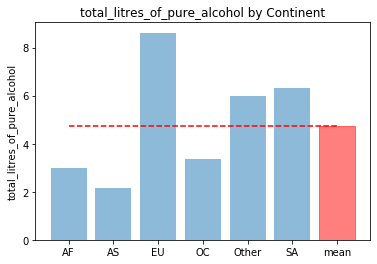

In [55]:
# 대륙별 total_litres_of_pure_alcohol을 시각화

continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_mean
total_mean = drinks['total_litres_of_pure_alcohol'].mean()

continents = continent_mean.index.tolist()
continents

continents.append('mean')
continents

x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol
alcohol.append(total_mean)
alcohol

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r') #mean값만 빨간색으로 표시
plt.plot([0,6], [total_mean, total_mean], 'r--') #mean값을 표기하는 선그래프, x와 y값의 시작값 끝값 지정가능, r--:빨간색상의 점선
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()


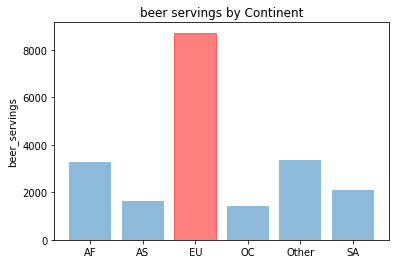

In [65]:
# 대륙별 beer_servings를 시각화

beer_group = drinks.groupby('continent').beer_servings.sum()
beer_group

continents = beer_group.index.tolist()
continents

x_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(x_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer servings by Continent')

plt.show()


## step4. 통계적분석 : 분석 대상 간의 통계적 차이 검정하기

#### ** t-test : 두 집단간의 평균차에 대한 검정방법
#### ** p-value : 귀무가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률(유의확률)

In [78]:
# 아프리카와 유럽 간의 맥주 소비량은 유의미한 차이가 있을까?

africa = drinks.loc[drinks['continent']=='AF']  #df.loc[행에대한 정보, 열에대한 정보] 데이터 추출
europe = drinks.loc[drinks['continent']=='EU']


from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) # 두집단의 분산이 같은경우
print(tTestResult)

tTestResultDiff = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var = False) #다른경우
print(tTestResultDiff)

print('The t-statistics and p-value assuming equal variance is %.3f and %.3f' % tTestResult)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)
Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)
The t-statistics and p-value assuming equal variance is -7.268 and 0.000


In [100]:
# 대한민국은 얼마나 술을 독하게 마시는 나라일까?

drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']

drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

drinks.head(10)

country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = 'alcohol_rate', ascending=False)
print(country_with_rank.head(5))

          country  alcohol_rate
63         Gambia      0.266667
153  Sierra Leone      0.223333
124       Nigeria      0.185714
179        Uganda      0.153704
142        Rwanda      0.151111


14


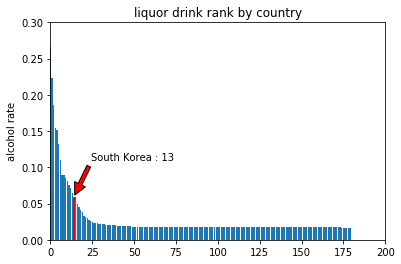

In [121]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank = country_list.index('South Korea')
print(korea_rank)
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

plt.annotate('South Korea : ' + str(korea_rank -1),
            xy = (korea_rank, korea_alc_rate),
            xytext=(korea_rank+10, korea_alc_rate+0.05),
            arrowprops=dict(facecolor='red',shrink=0.05))
plt.show()